In [1]:
import numpy as np
import scipy
import librosa, librosa.display
print(librosa.__version__)
import matplotlib.pyplot as plt
#render plot option - matplotlib inline or matplotlib notebook or matplotlib nbagg
%matplotlib widget
#select a different color-scheme for the plots
import matplotlib.style as ms
ms.use("seaborn-v0_8")  
import IPython.display as Ipd

0.10.1


(421888,)
9.567


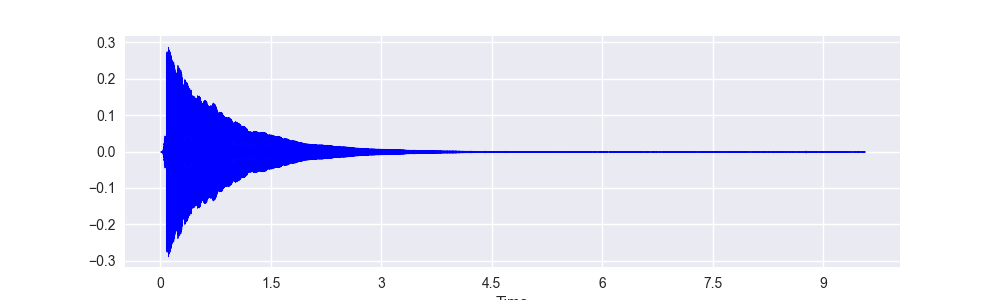

In [34]:
sample_name = 'G4-circular'
filepath = f'data-processed/{sample_name}/{sample_name}-sound-2.wav'
sr = 44100 # sampling rate
signal, sr = librosa.load(filepath, sr=sr, mono=False)
print(signal.shape)
print('{:2.3f}'.format(librosa.samples_to_time(signal.shape[0], sr=sr)))
plt.figure(figsize=(10, 3))
librosa.display.waveshow(y=signal, sr=sr, color="blue")
Ipd.Audio(signal, rate=sr) # play audio

Calculate RMS

[Text(0.5, 1.0, 'log Power spectrogram')]

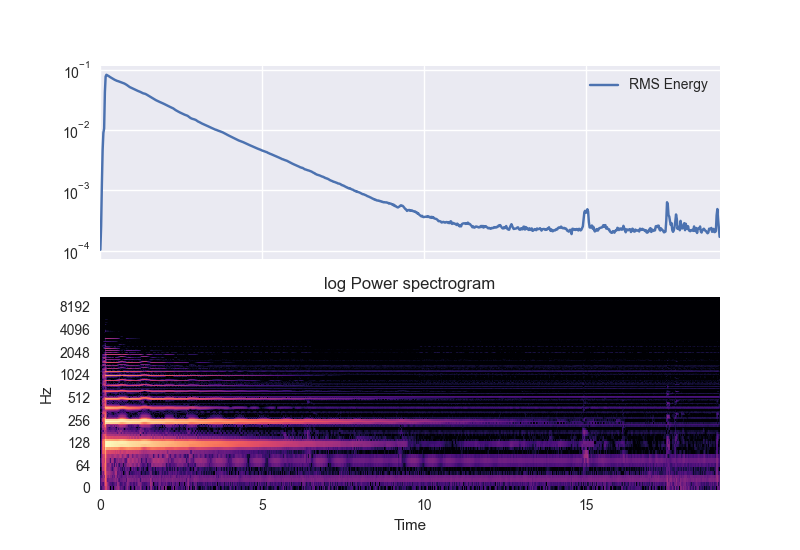

In [35]:
S, phase = librosa.magphase(librosa.stft(signal))
rms = librosa.feature.rms(S=S)

fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(rms)
ax[0].semilogy(times, rms[0], label='RMS Energy')
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')

Spectral centroid

[Text(0.5, 1.0, 'log Power spectrogram')]

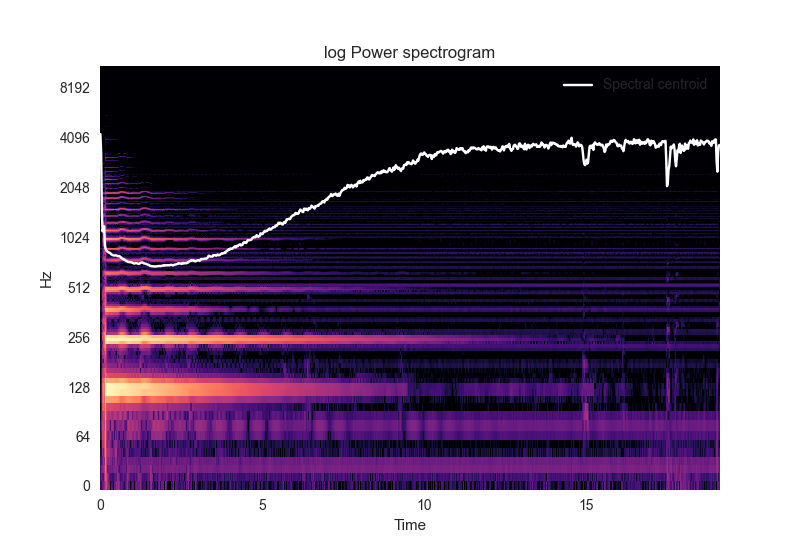

In [36]:
cent = librosa.feature.spectral_centroid(y=signal, sr=sr)

times = librosa.times_like(cent)
fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(times, cent.T, label='Spectral centroid', color='w')
ax.legend(loc='upper right')
ax.set(title='log Power spectrogram')

Spectral bandwidth

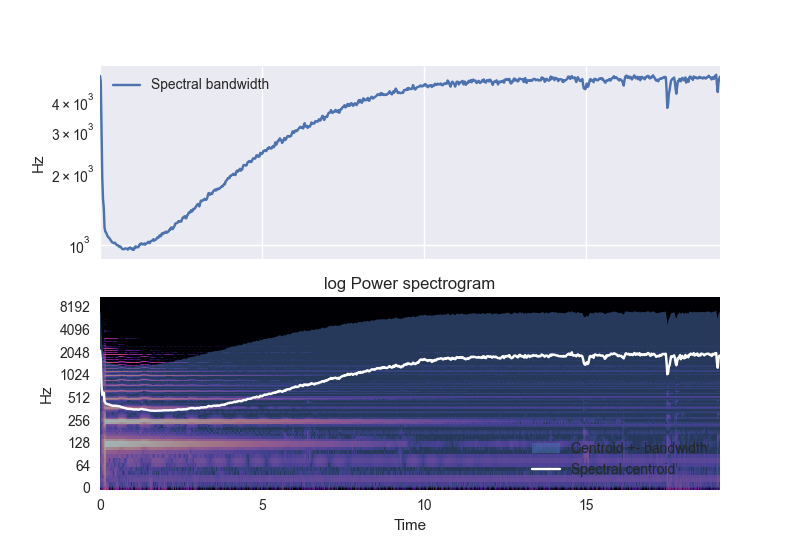

In [37]:
spec_bw = librosa.feature.spectral_bandwidth(y=signal, sr=sr)

S, phase = librosa.magphase(librosa.stft(y=signal))
librosa.feature.spectral_bandwidth(S=S)

freqs, times, D = librosa.reassigned_spectrogram(signal, fill_nan=True)
librosa.feature.spectral_bandwidth(S=np.abs(D), freq=freqs)

fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(spec_bw)
centroid = librosa.feature.spectral_centroid(S=S)
ax[0].semilogy(times, spec_bw[0], label='Spectral bandwidth')
ax[0].set(ylabel='Hz', xticks=[], xlim=[times.min(), times.max()])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')
ax[1].fill_between(times, np.maximum(0, centroid[0] - spec_bw[0]),
                np.minimum(centroid[0] + spec_bw[0], sr/2),
                alpha=0.5, label='Centroid +- bandwidth')
ax[1].plot(times, centroid[0], label='Spectral centroid', color='w')
ax[1].legend(loc='lower right')

Spectral contrast

[Text(0, 0.5, 'Frequency bands'), Text(0.5, 1.0, 'Spectral contrast')]

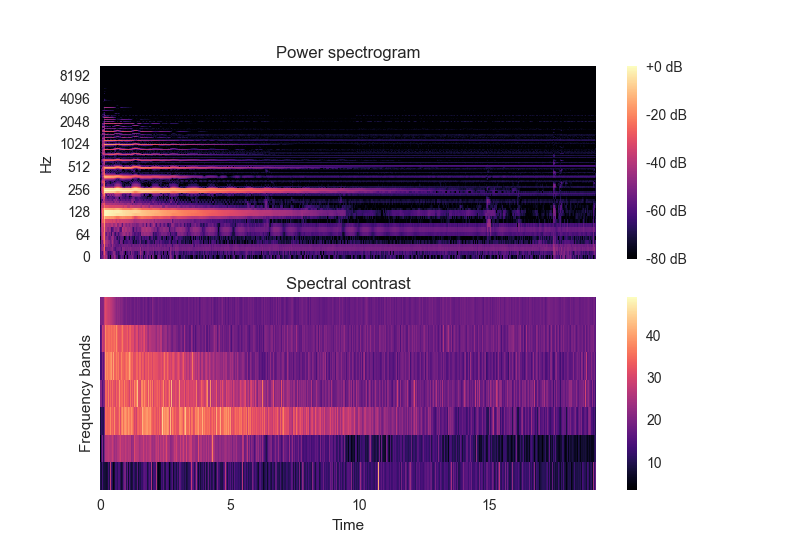

In [38]:
S = np.abs(librosa.stft(signal))
contrast = librosa.feature.spectral_contrast(S=S, sr=sr)

fig, ax = plt.subplots(nrows=2, sharex=True)
img1 = librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                                 y_axis='log', x_axis='time', ax=ax[0])
fig.colorbar(img1, ax=[ax[0]], format='%+2.0f dB')
ax[0].set(title='Power spectrogram')
ax[0].label_outer()
img2 = librosa.display.specshow(contrast, x_axis='time', ax=ax[1])
fig.colorbar(img2, ax=[ax[1]])
ax[1].set(ylabel='Frequency bands', title='Spectral contrast')

Spectral flatness

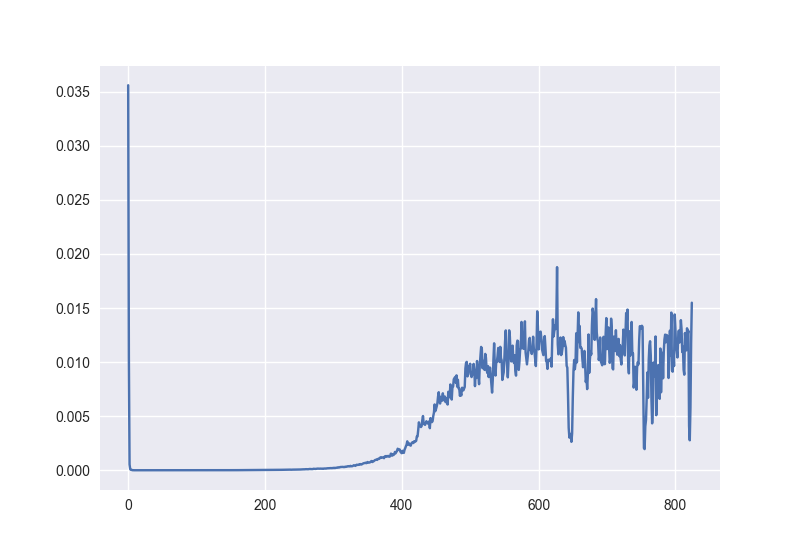

In [39]:
flatness = librosa.feature.spectral_flatness(y=signal)
fig, ax = plt.subplots()
ax.plot(flatness[0])

Spectral rolloff

[Text(0.5, 1.0, 'log Power spectrogram')]

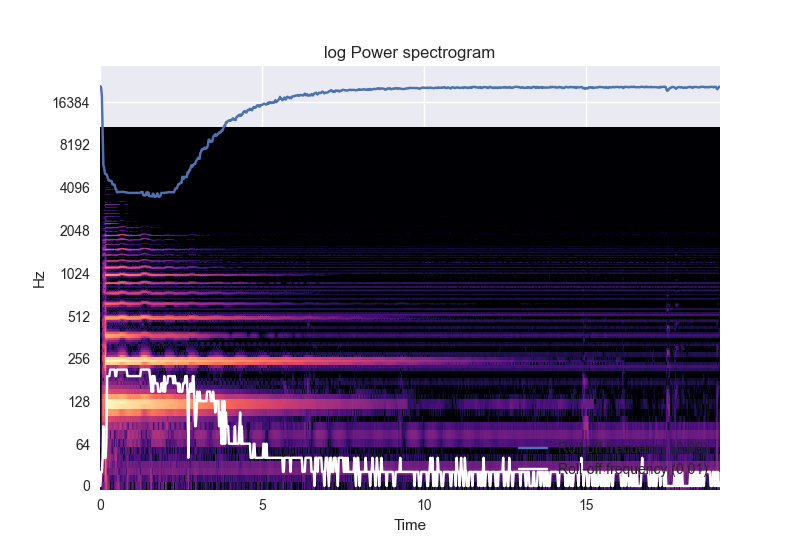

In [40]:
# Approximate maximum frequencies with roll_percent=0.85 (default)
librosa.feature.spectral_rolloff(y=signal, sr=sr)
# Approximate maximum frequencies with roll_percent=0.99
rolloff = librosa.feature.spectral_rolloff(y=signal, sr=sr, roll_percent=0.99)
# Approximate minimum frequencies with roll_percent=0.01
rolloff_min = librosa.feature.spectral_rolloff(y=signal, sr=sr, roll_percent=0.01)

S, phase = librosa.magphase(librosa.stft(signal))
librosa.feature.spectral_rolloff(S=S, sr=sr)

# With a higher roll percentage:
librosa.feature.spectral_rolloff(y=signal, sr=sr, roll_percent=0.95)

fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(librosa.times_like(rolloff), rolloff[0], label='Roll-off frequency (0.99)')
ax.plot(librosa.times_like(rolloff), rolloff_min[0], color='w',
        label='Roll-off frequency (0.01)')
ax.legend(loc='lower right')
ax.set(title='log Power spectrogram')

Poly features

/var/folders/60/xw_4m7ds65q08s4l62v0_4pr0000gp/T/ipykernel_66448/654422537.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(nrows=4, sharex=True, figsize=(8, 8))


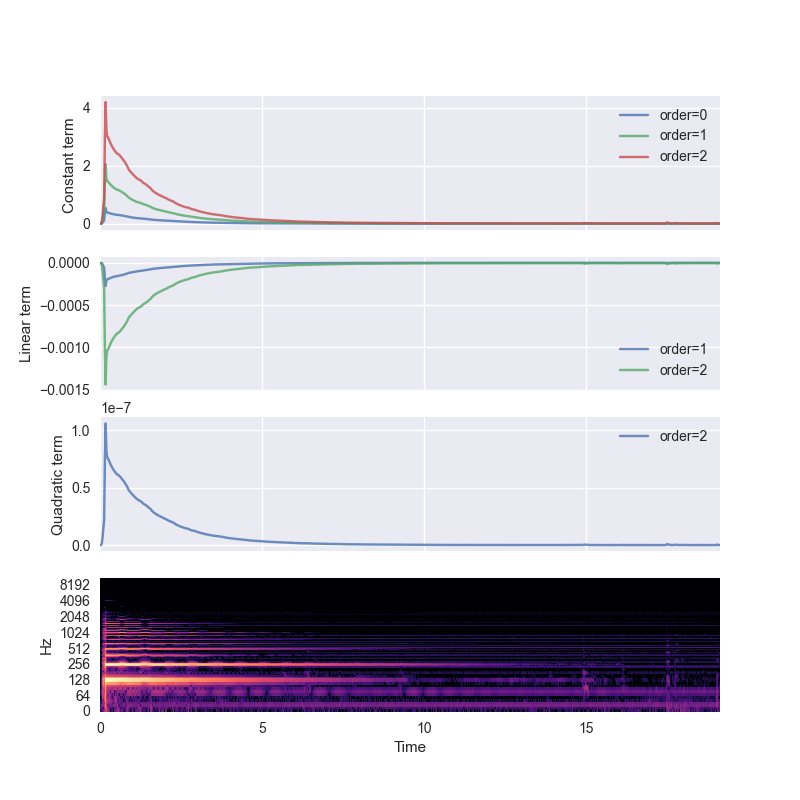

In [41]:
S = np.abs(librosa.stft(signal))

p0 = librosa.feature.poly_features(S=S, order=0)
p1 = librosa.feature.poly_features(S=S, order=1)
p2 = librosa.feature.poly_features(S=S, order=2)

fig, ax = plt.subplots(nrows=4, sharex=True, figsize=(8, 8))
times = librosa.times_like(p0)
ax[0].plot(times, p0[0], label='order=0', alpha=0.8)
ax[0].plot(times, p1[1], label='order=1', alpha=0.8)
ax[0].plot(times, p2[2], label='order=2', alpha=0.8)
ax[0].legend()
ax[0].label_outer()
ax[0].set(ylabel='Constant term ')
ax[1].plot(times, p1[0], label='order=1', alpha=0.8)
ax[1].plot(times, p2[1], label='order=2', alpha=0.8)
ax[1].set(ylabel='Linear term')
ax[1].label_outer()
ax[1].legend()
ax[2].plot(times, p2[0], label='order=2', alpha=0.8)
ax[2].set(ylabel='Quadratic term')
ax[2].legend()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[3])

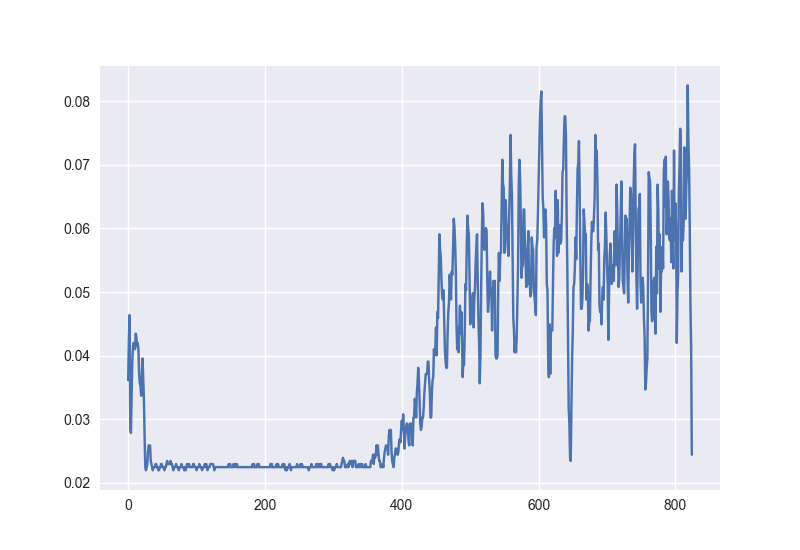

In [42]:
zero_crossing = librosa.feature.zero_crossing_rate(signal)
fig, ax = plt.subplots()
ax.plot(zero_crossing[0])

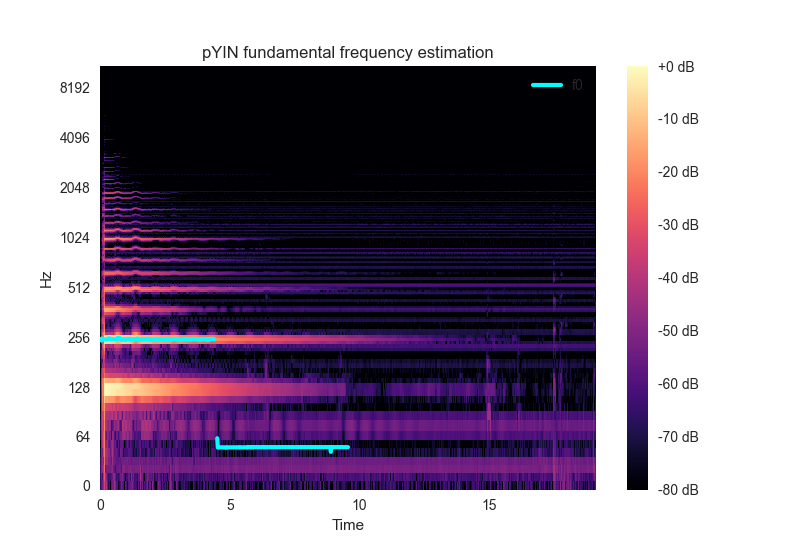

In [44]:
f0, voiced_flag, voiced_probs = librosa.pyin(signal,
                                             sr=sr,
                                             fmin=librosa.note_to_hz('C1'),
                                             fmax=librosa.note_to_hz('C7'))
times = librosa.times_like(f0, sr=sr)

D = librosa.amplitude_to_db(np.abs(librosa.stft(signal)), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(D, x_axis='time', y_axis='log', ax=ax)
ax.set(title='pYIN fundamental frequency estimation')
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.plot(times, f0, label='f0', color='cyan', linewidth=3)
ax.legend(loc='upper right')

[Text(0, 0.5, 'Harmonics')]

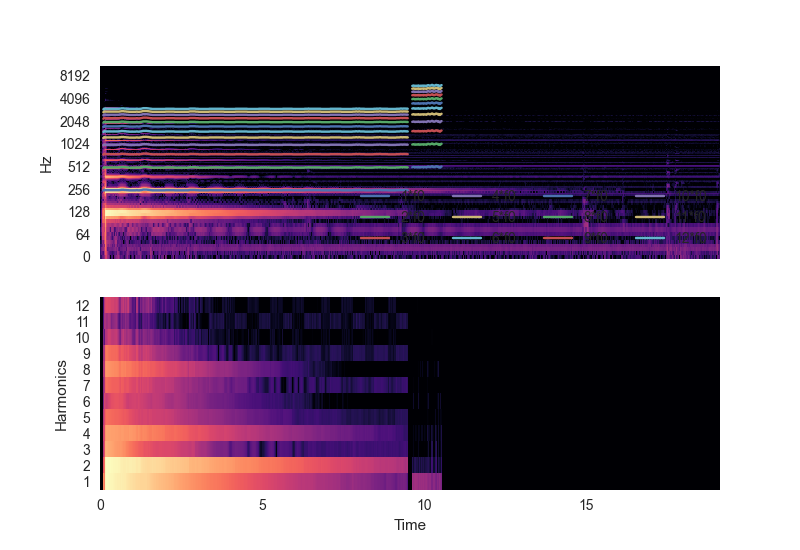

In [45]:
f0, voicing, voicing_p = librosa.pyin(y=signal, sr=sr, fmin=200, fmax=700)
S = np.abs(librosa.stft(signal))
freqs = librosa.fft_frequencies(sr=sr)
harmonics = np.arange(1, 13)
f0_harm = librosa.f0_harmonics(S, freqs=freqs, f0=f0, harmonics=harmonics)

fig, ax = plt.subplots(nrows=2, sharex=True)
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         x_axis='time', y_axis='log', ax=ax[0])
times = librosa.times_like(f0)
for h in harmonics:
    ax[0].plot(times, h * f0, label=f"{h}*f0")
ax[0].legend(ncols=4, loc='lower right')
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(f0_harm, ref=np.max),
                         x_axis='time', ax=ax[1])
ax[1].set_yticks(harmonics-1)
ax[1].set_yticklabels(harmonics)
ax[1].set(ylabel='Harmonics')

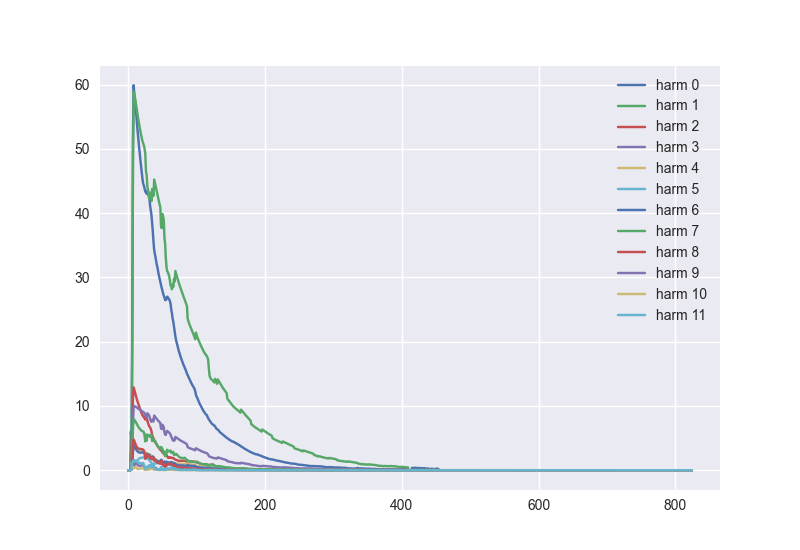

In [59]:
fig, ax = plt.subplots()
for i in range(12):
    ax.plot(f0_harm[i], label=f'harm {i}')
ax.legend()